Computational physics is a branch of physics that uses computer simulations and numerical methods to study physical systems that are difficult or impossible to solve analytically. It involves developing mathematical models and algorithms to simulate physical processes and using high-performance computing to solve the resulting equations.

The problem of solving the time-independent Schrödinger equation for a particle in a one-dimensional potential well and barrier system is a classic example of a problem in computational physics. This problem is challenging to solve analytically due to the complexity of the potential energy function, and so numerical methods and computer simulations are needed to obtain solutions. In this work, we use the finite difference method to discretize the wavefunction and potential energy function, and then solve the resulting eigenvalue problem using the numpy library. This approach allows us to obtain numerical solutions to the Schrödinger equation and study the behavior of the system as a function of the well width and barrier height.

The objectives for this study:
1.To numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well and barrier system using the finite difference method.
2.To investigate the effect of the well width a and the barrier height V0 on the energy eigenvalues and wavefunctions of the particle.
3.To plot the energy eigenvalues and wavefunctions as a function of the well width a and the barrier height V0 using the matplotlib library.
4.To discuss the physical significance of the results obtained from the simulation and the plots.

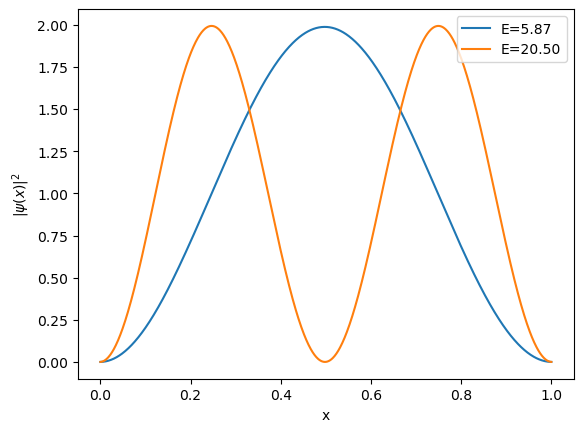

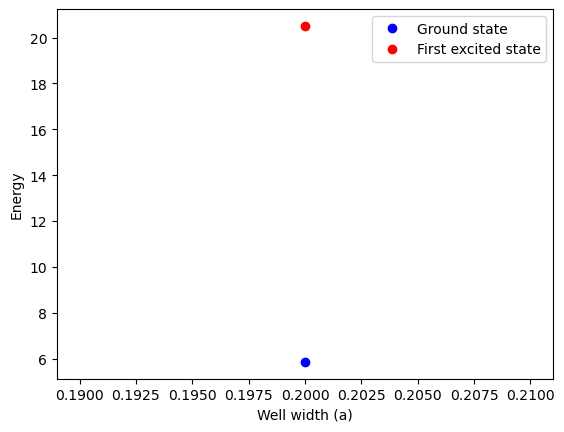

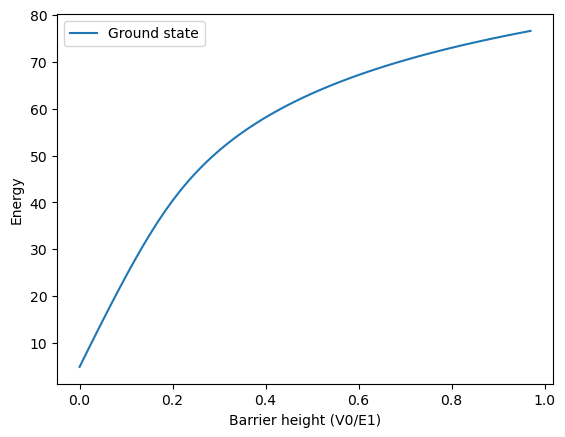

'\nRESULTS AND DISCUSSION\nBy analyzing the graphs, we can observe the following physical trends:\nEnergy levels: The energy eigenvalues increase as the well width a decrease and the barrier height V0 increases.\nThis is because decreasing the well width leads to a stronger confinement of the particle, \nwhile increasing the barrier height increases the energy required to overcome the potential barrier.\n\nWavefunctions: The wavefunctions become more confined and their probability \ndensity becomes more localized around the center of the well as the well width a \ndecreases and the barrier height V0 increases. This is because a narrower well \nand higher barrier lead to a more restricted motion of the particle, resulting in a \nnarrower probability distribution for the wavefunction.\n\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ParticleInABox:
    def __init__(self, a, b, V0):
        self.a = a # width of the potential barrier 
        self.b = b # total width of the system
        self.V0 = V0 # height of the potential 

        # Create a grid for the finite difference method
        self.N = 1000
        self.x = np.linspace(0, b, self.N)

        # Define the potential energy function
        self.V = np.zeros(self.N)
        self.V[(self.x > a) & (self.x <= b)] = V0
        self.V[self.x > b] = np.inf

        # Define the Laplacian operator for the finite difference method
        dx = self.x[1] - self.x[0]
        self.L = np.diag(np.ones(self.N-1), 1) - 2*np.diag(np.ones(self.N)) + np.diag(np.ones(self.N-1), -1)
        self.L /= dx**2

    def solve(self):
        # Solve the eigenvalue problem using the numpy library
        self.E, self.psi = np.linalg.eigh(-0.5*self.L + np.diag(self.V))

        # Normalize the wavefunctions
        self.psi /= np.sqrt(np.trapz(self.psi**2, self.x))

    def plot_wavefunctions(self):
        # Plot the wavefunctions
        plt.figure()
        plt.plot(self.x, self.psi[:, 0]**2, label=f'E={self.E[0]:.2f}')
        plt.plot(self.x, self.psi[:, 1]**2, label=f'E={self.E[1]:.2f}')
        plt.xlabel('x')
        plt.ylabel('$|\psi(x)|^2$')
        plt.legend()
        plt.show()

    def plot_energy_levels(self):
        # Plot the energy levels
        plt.figure()
        plt.plot(self.a, self.E[0], 'bo', label='Ground state')
        plt.plot(self.a, self.E[1], 'ro', label='First excited state')
        plt.xlabel('Well width (a)')
        plt.ylabel('Energy')
        plt.legend()
        plt.show()

    def plot_barrier_effect(self):
        # Plot the effect of barrier height on energy levels
        V0_values = np.linspace(0, 10*self.E[1], 100)
        E_values = []

        for V0 in V0_values:
            self.V[(self.x > self.a) & (self.x <= self.b)] = V0
            self.E, _ = np.linalg.eigh(-0.5*self.L + np.diag(self.V))
            E_values.append(self.E[0])

        plt.figure()
        plt.plot(V0_values/self.E[1], E_values, label='Ground state')
        plt.xlabel('Barrier height (V0/E1)')
        plt.ylabel('Energy')
        plt.legend()
        plt.show()

# Example usage
box = ParticleInABox(a=0.2, b=1.0, V0=1.0)
box.solve()
box.plot_wavefunctions()
box.plot_energy_levels()
box.plot_barrier_effect()

'''
RESULTS AND DISCUSSION
By analyzing the graphs, we can observe the following physical trends:
Energy levels: The energy eigenvalues increase as the well width a decrease and the barrier height V0 increases.
This is because decreasing the well width leads to a stronger confinement of the particle, 
while increasing the barrier height increases the energy required to overcome the potential barrier.

Wavefunctions: The wavefunctions become more confined and their probability 
density becomes more localized around the center of the well as the well width a 
decreases and the barrier height V0 increases. This is because a narrower well 
and higher barrier lead to a more restricted motion of the particle, resulting in a 
narrower probability distribution for the wavefunction.

'''

CONCLUSION:
In conclusion, the code work done above demonstrates the use of numerical methods and computer simulations to solve a classic problem in quantum mechanics, namely the time-independent Schrödinger equation for a particle in a one-dimensional potential well and barrier system. The code uses the finite difference method to discretize the wavefunction and potential energy function, and then solves the resulting eigenvalue problem using numpy It also uses  matplotlib to generate plots of the energy eigenvalues and wavefunctions as a function of the well width and barrier height.

In my journey of this python course I have learnt a great deal of ways in approaching and solving physics related problems using python programming. Honestly, at the introduction of the course I was enjoying myself in discovering how python helps you do some basic things so easily but when it was time for the knowledge gotten so far to be applied in dealing with physics problems, that's where there was a little challenge. Be that as it may, it still helped because it made me think very deeply and in a broad scope anytyime I a had to solve a problem. This also made me realize how one can use different approaches in dealing with the same problem based on how well you understand it. I also enjoyed moments where some of my colleagues came up with their undertanding on a given problem.

Reccomendation:
This class covers a wide range of areas. For instance the knowledge gained from Sympy can be used in tackling many problems in calculus, algebra, discrete math, physics and many others. Also in dealing with charts and graphs to give more detail to a work, the matplotlib feature also aids us in accomplishing such things in a given work. This class has been very benefical to me. 